Doing analysis on books_data and ratings_data like:

- Number of unique books

- Number of unique users

- Author who has written maximum number of books from the data

- Best rated books

- User who has rated maximum number of books

- Maximum ratings given in the range 1-5

- Books which have not yet been rated


In [1]:
#Libraries used
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
#Impoting the csv files
books_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
ratings_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
book_tags_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv')
tags_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv')
to_read_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv')

In [3]:
#display first 5 rows of books_data
books_data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
#display first 5 rows of ratings_data
ratings_data.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
#Number of unique books by Id
print(books_data.book_id.unique())
print('Number of unique books by Id = ',len(books_data.book_id.unique()))

[    1     2     3 ...,  9998  9999 10000]
Number of unique books by Id =  10000


In [6]:
#Number of unique books by title
book_titles=books_data.original_title
print(book_titles.unique())
print('\nNumber of unique books by title = ',len(book_titles.unique()))
print('Total number of books = ',len(book_titles))

['The Hunger Games' "Harry Potter and the Philosopher's Stone" 'Twilight'
 ..., 'The Mauritius Command'
 'Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture'
 'The First World War']

Number of unique books by title =  9275
Total number of books =  10000


In [7]:
from collections import Counter
dup_titles=[item for item,count in Counter(book_titles).items() if count>1]
print(dup_titles)
print('\nNumber of duplicate titled books:',len(dup_titles))

[nan, 'Feed', 'Cold Fire', 'Heaven', 'Defiance', 'Hero', 'Into the Wild', 'Seize the Night', 'Until You', 'Heart of Darkness', 'The Chase', 'Then Came You', 'Home', 'A Grief Observed', 'The Guardian', 'Fever', 'Broken', 'Leviathan', 'City of Bones', 'The Enemy', 'Northern Lights', 'Twisted', 'Sisters', 'Fairest', 'Selected Poems', 'Gone', 'Wicked', 'Fallen', 'The Negotiator', 'At the Mountains of Madness', 'Snuff', 'Wanted', 'The Innocent', 'Dawn', 'The Wedding', 'Damaged', 'Invisible', 'Ghost Story', 'Inferno', 'Heartless', 'Underworld', 'The Heist', 'The Lake House', 'The Firm', 'Arcadia', 'Dark Reunion', 'Simply Irresistible', 'Blackout', 'Open Season', 'Destined', ' ', 'The Legend of Sleepy Hollow', 'Different Seasons', 'Pure', 'Bloodline', 'Zodiac', 'Haunted', 'Abandon', 'Shattered', 'The Hedge Knight', 'Perfect', 'The List', 'The Awakening', 'Scarlet', 'Breathe', 'Shock Wave', 'Nevermore', 'Persepolis', 'Twilight', 'The Beach House', 'Once', 'Private', 'Shadowland', 'Sea Glass', 

In [8]:
#Number of Unique users
print('\nNumber of unique users:',len(ratings_data.user_id.unique()))


Number of unique users: 53424


In [9]:
#Total number of ratings given by users
print('Total number of ratings given by users: ',len(ratings_data))

Total number of ratings given by users:  5976479


In [10]:
#Top Author with maximum number of books
#np.bincount(books_data.authors).argmax()
from collections import Counter
author_freq = (word for word in books_data.authors if word[:1].isupper())
c = Counter(author_freq)
print (c.most_common(10))

[('Stephen King', 60), ('Nora Roberts', 59), ('Dean Koontz', 47), ('Terry Pratchett', 42), ('Agatha Christie', 39), ('Meg Cabot', 37), ('James Patterson', 36), ('David Baldacci', 34), ('J.D. Robb', 33), ('John Grisham', 33)]


for r in ratings_data:
    print(r)
    if r.rating==5:
        for b in books_data:
            if r.book_id==b.book_id:
                print (b.original_title)

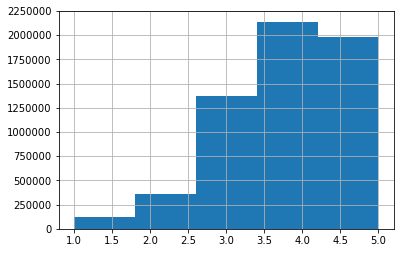

In [11]:
#Maximum ratings given in the range 1-5
ratings_data.rating.hist( bins = 5 )

In [12]:
#User who has rated max number of books
from collections import Counter
user_freq = (word for word in ratings_data.user_id)
c = Counter(user_freq)
print ('Top 10 Users and the number of books they have rated: ',c.most_common(10))

Top 10 Users and the number of books they have rated:  [(12874, 200), (30944, 200), (12381, 199), (28158, 199), (52036, 199), (6630, 197), (45554, 197), (7563, 196), (9668, 196), (9806, 196)]
